In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('cleaned_data.csv')
data = data.drop(columns=['Unnamed: 0'])
data['rating']=data['rating'].map({1:'Negative',2:'Negative',3:'Neutral',4:'Positive',5:'Positive'})
data

,source,review_description,rating,review_date
0,Google Play,thread meta fantastic app staying connected cl...,Positive,2024-01-03 10:16:17
1,Google Play,nothing scammer trust,Negative,2024-01-01 13:36:11
2,Google Play,awesome,Positive,2023-12-17 22:40:19
3,Google Play,nice app,Neutral,2023-12-14 01:49:26
4,Google Play,great alternative twitter x,Positive,2023-12-08 19:32:42
...,...,...,...,...
45280,App Store,many false information cant ignore cant hide r...,Negative,2023-12-13 19:25:04
45281,App Store,app malfunction constantly wont let post anyth...,Negative,2023-12-13 03:01:16
45282,App Store,thread messaging thread weaving fabric life,Positive,2023-11-29 13:49:52
45283,App Store,white house need account,Positive,2023-11-27 18:51:49


In [3]:
data.dropna(inplace=True)

In [4]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [5]:
data['review_description'] = data['review_description'].apply(clean_review)

In [6]:
#wordcloud 

from wordcloud import WordCloud

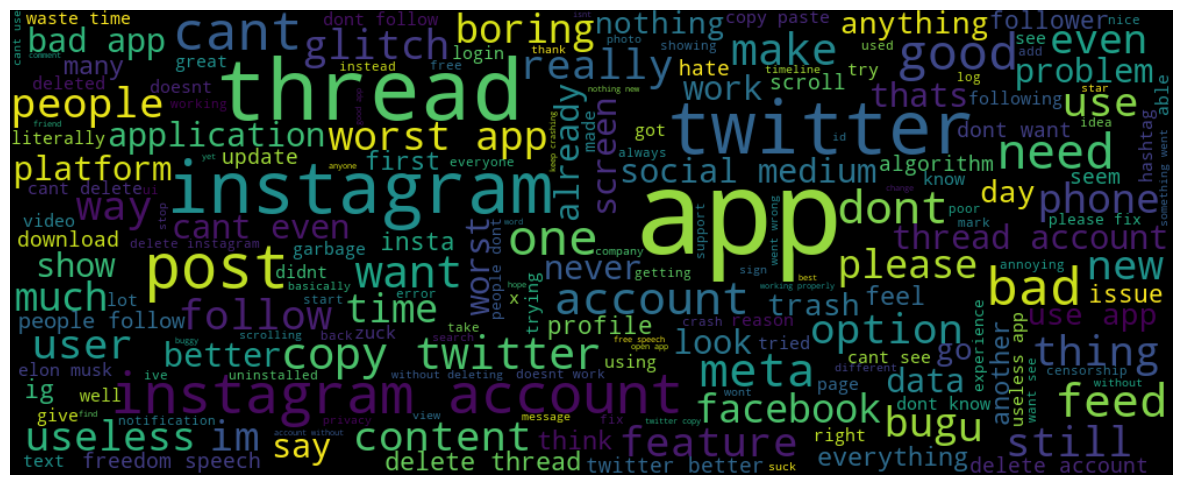

In [7]:
#draw Wordcloud
reviews = ' '.join(word for word in data['review_description'][data['rating'] == 'Negative'].astype(str))
wordcloud = WordCloud(height = 400,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

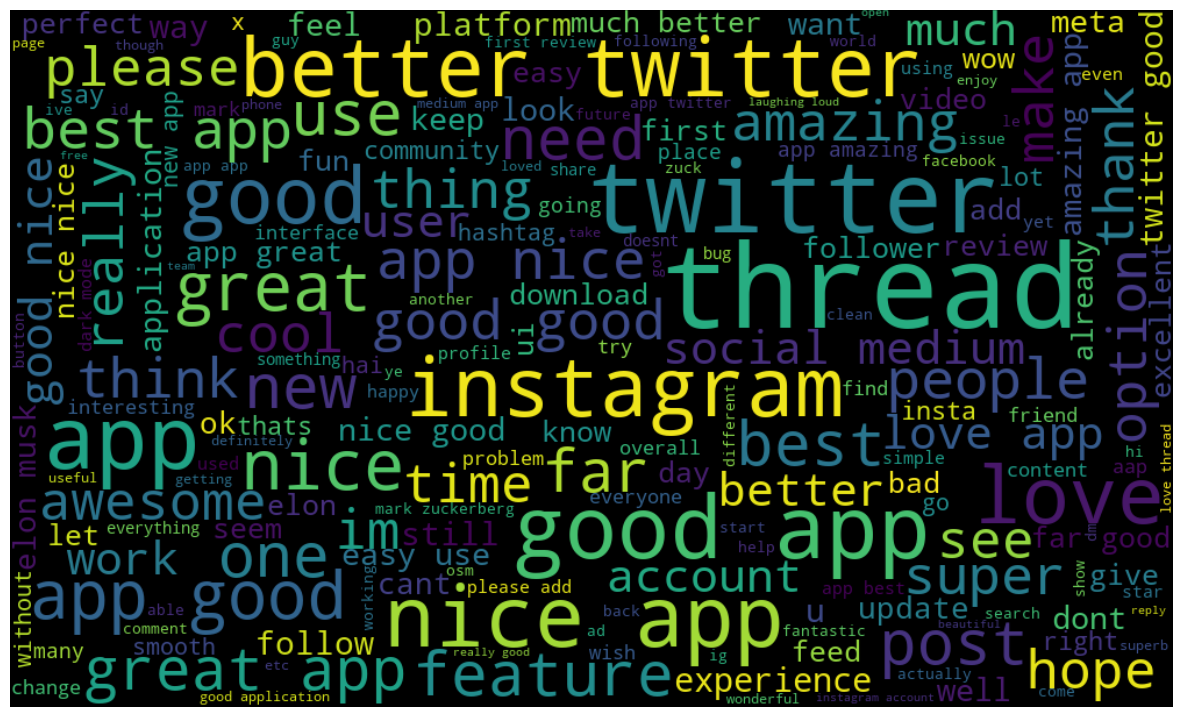

In [8]:
reviews = ' '.join(word for word in data['review_description'][data['rating']== 'Positive'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [10]:
data['review_description'] = data['review_description'].fillna('')  # Fill NaN values with an empty string
reviews = cv.fit_transform(data['review_description']).toarray()

In [11]:
data['rating'] = data['rating'].replace(['Positive','Negative', 'Neutral'],[1,-1,0])

In [12]:
data['rating'].value_counts()

rating
 1    24304
-1    17479
 0     3501
Name: count, dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['rating'], test_size=0.2)

In [17]:
model.fit(reviews_train,sent_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
predict = model.predict(reviews_test)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['rating'], test_size=0.2)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(reviews_train, sent_train)

# Make predictions on the testing data
sent_pred = model.predict(reviews_test)

# Calculate the accuracy
accuracy = accuracy_score(sent_test, sent_pred)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 80.11%


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


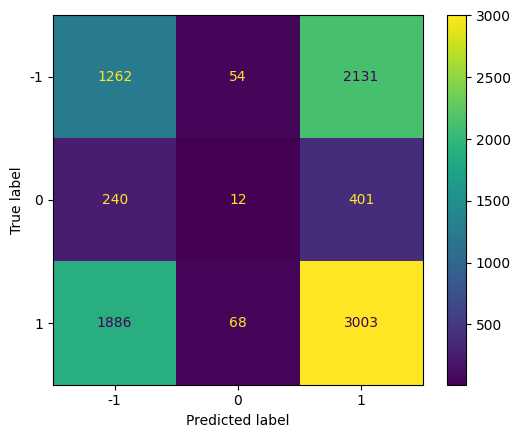

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [32]:
import pickle as pk

In [33]:
pk.dump(model,open('model.pkl','wb'))

In [34]:
pk.dump(cv,open('scaler.pkl','wb'))

In [38]:
import pickle as pk
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the previously trained model and scaler
model = pk.load(open('model.pkl', 'rb'))
scaler = pk.load(open('scaler.pkl', 'rb'))

# Get the review input from the user
review = input('Enter App Review: ')

# Transform the review using the scaler
review_scale = scaler.transform([review]).toarray()

# Make predictions using the loaded model
result = model.predict(review_scale)

# Output the prediction
if result[0] == 0:
    print('Neutral Review')
elif result[0] == 1:
    print('Positive Review')
else:
    print('Negative Review')

Enter App Review:  instagram is way more better than this app


Positive Review
